<a href="https://colab.research.google.com/github/iramos02/bio108tutorial/blob/main/HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing global bird biodiversity


Learning Objectives:

*   Understand why raster data can be useful for investigating and answering conservation questions
*   Learn how to run simple analyses using raster data












# What is raster data?

Raster data consists of cells/pixels that are organized into a grid. Each cell/pixel contains a value representing information. This could range from temperature, to precipitation, to topographic map features ... to species diversity!

Overall, raster data is really useful for helping visualize
information.

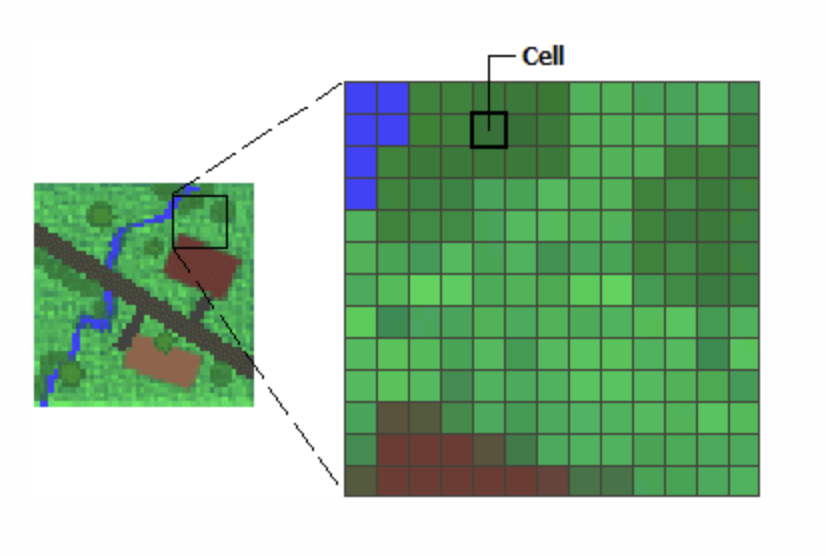



Using raster data the main questions I will be addressing in this tutorial are:


1.   What areas of the world have the highest species richness of birds?
2.   Which areas in the world are of particular concern for bird species?

**Background**

Birds are an ideal study species as they are a well documented and well studied organism, thus typically there are a lot of datasets we can work with. With the rise of citizen science programs as well such as eBird and iNaturalist, there has been an increase in the amount of bird documentations that are publically available.

Moreover, as many of us know we are currently living in a biodiversity crisis. Due to loss of habitat and climate change many species, including birds are declining globally. Thus, birds can be used as a good indicator species as well as a model organism that we can use to analyze changes in global biodiversity.  

First lets install the necessary libraries


In [3]:
! pip install rasterio fiona
! pip install -U leafmap
! pip install fiona
! pip install folium matplotlib mapclassify
! pip install localtileserver
! pip install rasterio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1

Install other libraries:

Next, we have to install other libraries that will be helpful in todays analyses. These libraries will allow us to import, analyze, and visualize our data!

In [4]:
##install all other necessary packages
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
import matplotlib.pyplot as plt
import leafmap



**IUCN redlist data**

The International Union for Conservation of Nature’s (IUCN) Red List of Threatened Species was created in 1964 and is now one of the most comprehensive resource for tracking the global conservation status of animal, fungi and plant species.

The IUCN Red List provides information about range, population size, habitat and ecology, threats, and conservation actions that will help inform necessary conservation decisions.

The IUCN has different categories for classifying species


1.   Data Deficient (DD)
2.   Least Concern (LC)
3. Near Threatenet (NT)
4. Vulnerable (VU)
5. Endangered (EN)
6. Critically Endangered (CR)
7. Extinct in the Wild (EW)
8. Extinct (EX)


The IUCN has raster datasets available tracking the Species Richness and Rarity-Weighted Richness for Amphibians, Birds, Mammals and Reptiles from 2017, 2021, 2022, 2023, and 2024!


*   **Species Richness** is a count of the number of species potentially occurring in

*   **Rarity-Weighted Richness** is the aggregate importance of each grid cell to the species occuring there. The value does not have any units, but indicates relative importance.

The IUCN has made two datasets per year -- One tracks all species regardless of their red list status while the other tracks threatened species which is defined as species that are Critically Endangered, Endangered, and Vulnerable.






## Import our raster data!

Now, we have to import our raster data. I did this by downloading .tif files from the IUCN red list

I have uploaded the files we will need for our analyses today into a github repository to streamline our workflow.

Read in our raster data:

Now we have to read in our downloaded raster data.
We will use the rasterio.open() function which creates a connection to the file without loading the entire dataset into memory.

In [5]:
##reading in first raster data for all bird species data
raster_path1 = (
    "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif"
)
src1 = rasterio.open(raster_path1)
print(src1)

<open DatasetReader name='https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif' mode='r'>


In [6]:
##reading in second raster data for threatened bird species
raster_path2 = (
    "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_SR_2024.tif"
)
src2 = rasterio.open(raster_path2)
print(src2)

<open DatasetReader name='https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_SR_2024.tif' mode='r'>


In [ ]:
## it's always good to check the metadata of your raster
src1.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 65535.0,
 'width': 1204,
 'height': 592,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(30000.0, 0.0, -18058187.677929368,
        0.0, -30000.0, 8764905.85562796)}

In [ ]:
src2.meta

{'driver': 'GTiff',
 'dtype': 'int8',
 'nodata': -128.0,
 'width': 1204,
 'height': 592,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(30000.0, 0.0, -18058187.677929368,
        0.0, -30000.0, 8764905.85562796)}

# Visualizing our data

Now we can easily visualize our data using rasterio.plot.show()

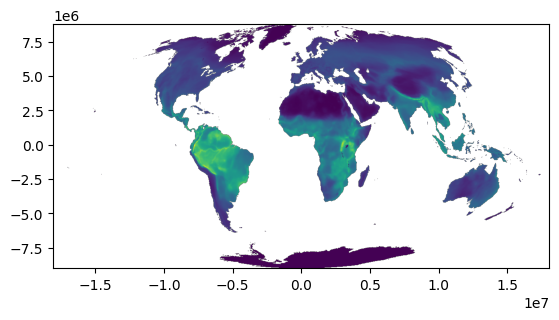

<Axes: >

In [ ]:
##visualizing our first raster data for all bird species richness globally
rasterio.plot.show(src1)

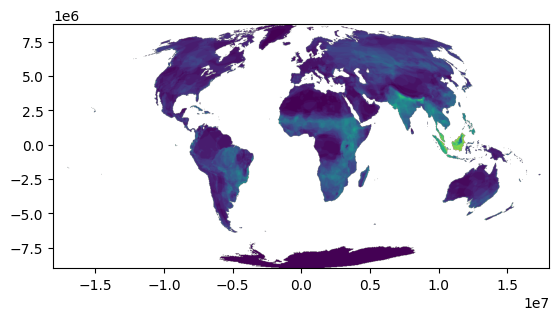

<Axes: >

In [ ]:
##visualizing our second raster data for threatened bird species richness globally
rasterio.plot.show(src2)

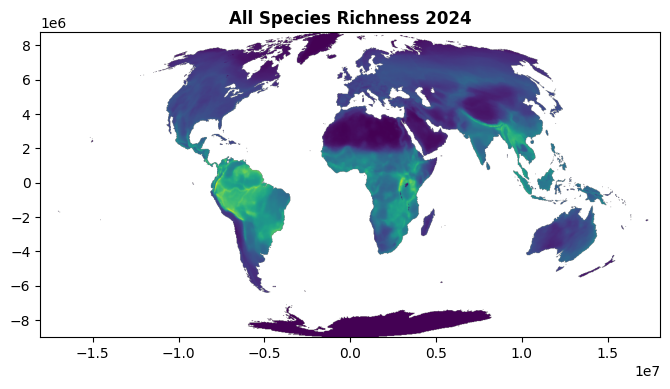

<Axes: title={'center': 'All Species Richness 2024'}>

In [ ]:
## we can add titles to our plots using various functions in rasterio
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src1, title="All Species Richness 2024")


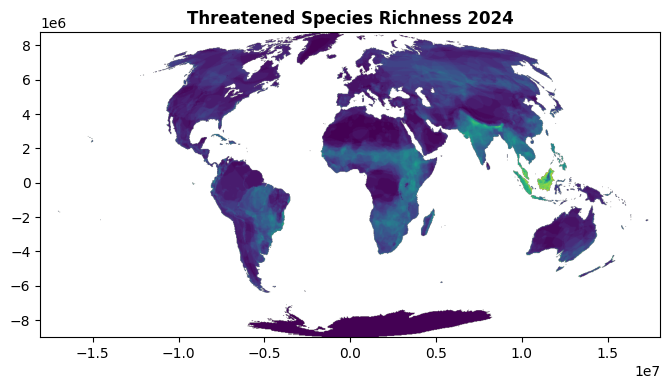

<Axes: title={'center': 'Threatened Species Richness 2024'}>

In [ ]:
##adding title to second plot
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src2, title="Threatened Species Richness 2024")


We can also use matplotlib to create a figure with both subplots and also add a colormap (cmap) and colorbars for better visualization!

An example of what this could look like is below:



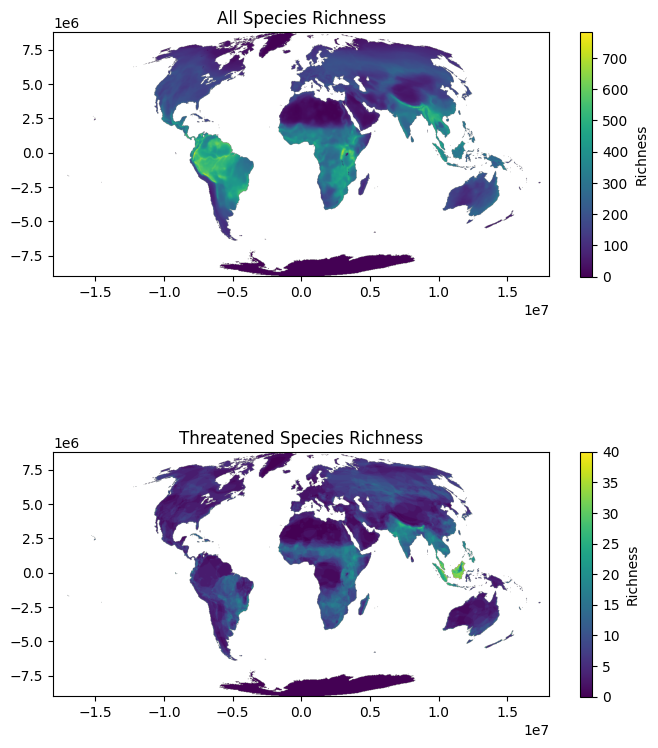

In [ ]:
##set figure axes rows, columns, and figure size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

##Plot first raster (All Species Richness)
im1 = rasterio.plot.show(src1, ax=axes[0], cmap="viridis")
axes[0].set_title("All Species Richness")

# Plot second raster (Threatened Species Richness)
im2 = rasterio.plot.show(src2, ax=axes[1], cmap="viridis")
axes[1].set_title("Threatened Species Richness")

# Add colorbars for each plot
fig.colorbar(im1.get_images()[0], ax=axes[0], label="Richness", shrink=0.7)
fig.colorbar(im2.get_images()[0], ax=axes[1], label="Richness", shrink=0.7)

plt.show()

## Interactive Maps

We can also create interactive maps using leafmaps!

Using leafmaps, you can create a map that you can add your own polygons, points, lines, and also zoom in and out of certain areas

In [ ]:
# Create an interactive map for all bird species richness 2024
m = leafmap.Map(center=[0, 0], zoom=2)  # Adjust center and zoom as needed

# Define raster file paths or load arrays
raster1 = "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif"


# Add rasters to the map with colormap and transparency
m.add_raster(raster1, colormap="viridis", layer_name="All Species Richness")


# Display the map
m

Map(center=[-2.5212259999999986, 0.07656999999997538], controls=(ZoomControl(options=['position', 'zoom_in_tex…

In [ ]:
# Create an interactive map for threatened species
m = leafmap.Map(center=[0, 0], zoom=2)  # Adjust center and zoom as needed

# Define raster file paths or load arrays
raster2 = "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_SR_2024.tif"

# Add rasters to the map with colormap and transparency
m.add_raster(raster2, colormap="magma", layer_name="Threatened Species Richness")

# Display the map
m

Map(center=[-2.5212259999999986, 0.07656999999997538], controls=(ZoomControl(options=['position', 'zoom_in_tex…

Discussion Questions:



1.   What do you notice about total bird species richness distribution?
2.  What do you notice about threatened bird species richness distribution?
2.   Which areas are of particular concern?
3. What are some conservation applications that can come from being able to visualize data such as this?



**Species Rarity-Weighted Richness**

The IUCN also has raster data for species rarity-weighted richness

"For each species the Rarity-Weighted Richness value for a cell is the proportion of the species' range contained within that cell. This can be the area of the pixel divided by the area of the species' range or (as in these analyses) 1 divided by the total number of cells overlapped by that species' range. These values are summed across all the species in the particular analysis to give the relative importance of each cell to the species found there.



For species with different breeding and non-breeding ranges, where a cell is contained in both ranges, the calculation is based on the smaller range, i.e. the season in which that area is more important." -IUCN WEBSITE

Lets load in and look at this data!

In [11]:
##reading in first raster data species rarity richness data for all birds
raster_path3 = (
    "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_RWR_2024.tif"
)
src3 = rasterio.open(raster_path3)
print(src3)

<open DatasetReader name='https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_RWR_2024.tif' mode='r'>


In [12]:
##reading in first raster data species rarity richness data for threatened birds
raster_path4 = (
    "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_RWR_2024.tif"
)
src4 = rasterio.open(raster_path4)
print(src4)

<open DatasetReader name='https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_RWR_2024.tif' mode='r'>


In [16]:
# Create an interactive map for all bird species rarity-weighted richness 2024
m = leafmap.Map(center=[0, 0], zoom=2)  # Adjust center and zoom as needed

# Define raster file paths or load arrays
raster3 = "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_RWR_2024.tif"


# Add rasters to the map with colormap and transparency
m.add_raster(raster3, colormap="viridis", layer_name="All Bird Species Rarity Richness")


# Display the map
m

Map(center=[-2.5212259999999986, 0.07656999999997538], controls=(ZoomControl(options=['position', 'zoom_in_tex…

In [17]:
# Create an interactive map for all bird species rarity-weighted richness 2024
m = leafmap.Map(center=[0, 0], zoom=2)  # Adjust center and zoom as needed

# Define raster file paths or load arrays
raster4 = "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_RWR_2024.tif"


# Add rasters to the map with colormap and transparency
m.add_raster(raster4, colormap="viridis", layer_name="All Bird Species Rarity Richness")


# Display the map
m

Map(center=[-2.5212259999999986, 0.07656999999997538], controls=(ZoomControl(options=['position', 'zoom_in_tex…

Discussion Questions:


1.   Why is looking at Rarity-Weighted Species Richness important?
2.   What new information does it tell us about global bird species richness for all bird and threatened bird species?



In [9]:
output_raster = "species_ratio"

with rasterio.open("https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif") as src:
    profile = src.profile
    profile.update(dtype=rasterio.float32, nodata=np.nan)

    with rasterio.open(output_raster, "w", **profile) as dst:
        dst.write(species_ratio.astype(rasterio.float32), 1)

# Create a Leafmap interactive map
m = leafmap.Map(center=[0, 0], zoom=2)  # Adjust center/zoom as needed
m.add_raster(output_raster, colormap="coolwarm", layer_name="Threatened Species Ratio")
m

Map(center=[-2.5212259999999986, 0.07656999999997538], controls=(ZoomControl(options=['position', 'zoom_in_tex…

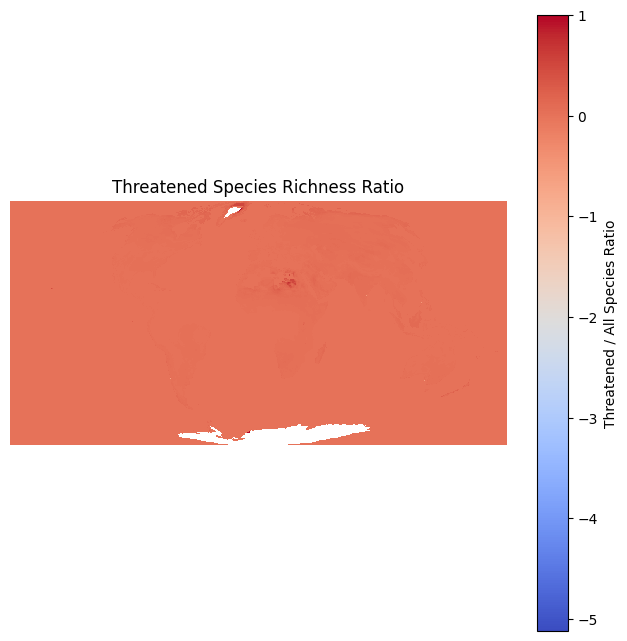

In [21]:
### idea for analyzing threatened/all species ration on map
all_species = src1.read(1)
threatened_species = src2.read(1)
species_ratio = np.where(all_species > 0, threatened_species / all_species, np.nan)

plt.figure(figsize=(8, 8))
plt.imshow(species_ratio, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Threatened / All Species Ratio")
plt.title("Threatened Species Richness Ratio")
plt.axis("off")
plt.show()